In [1]:
setwd('/import/hd/')

In [2]:
library(Seurat)
#library(SeuratData)
library(ggplot2)
library(cowplot)
library(dplyr)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'cowplot' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [3]:
library("Seurat")
library("ggplot2")
library("cowplot")
library("dplyr")
library("hdf5r")

Warning message:
"package 'hdf5r' was built under R version 4.2.2"


In [4]:
list.dirs()

[1] "."                                "./N2"                            
 [3] "./N2/filtered_feature_bc_matrix"  "./N2/spatial"                    
 [5] "./OA7"                            "./OA7/filtered_feature_bc_matrix"
 [7] "./OA7/spatial"                    "./sc"                            
 [9] "./sc/.ipynb_checkpoints"          "./sc/OA_1"                       
[11] "./sc/OA_2"                        "./sc/OA_3"                       
[13] "./sc/healthy_1"                   "./sc/healthy_2"                  
[15] "./sc/healthy_3"

In [5]:
##读取矩阵文件
name='N2'
expr <- "./N2/filtered_feature_bc_matrix/"

In [6]:
expr.mydata <- Seurat::Read10X(expr )

In [7]:
mydata <- Seurat::CreateSeuratObject(counts = expr.mydata, project = name, assay = 'Spatial')
mydata$slice <- 1
mydata$region <- name#命名

In [8]:
#读取镜像文件
imgpath <- "./N2/spatial/"
img <- Seurat::Read10X_Image(image.dir = imgpath)

In [9]:
Seurat::DefaultAssay(object = img) <- 'Spatial'
img <- img[colnames(x = mydata)]
mydata[['image']] <- img
mydata  #查看数据

An object of class Seurat 
18085 features across 1308 samples within 1 assay 
Active assay: Spatial (18085 features, 0 variable features)
 1 image present: image

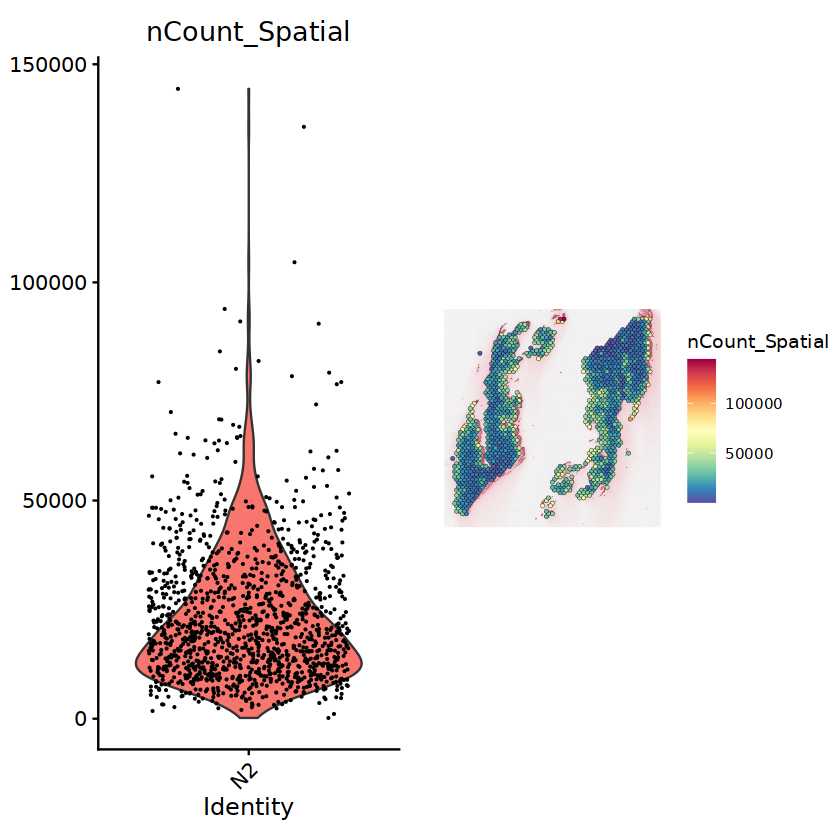

In [10]:
plot1 <- VlnPlot(mydata, features = "nCount_Spatial", pt.size = 0.1) + NoLegend()
plot2 <- SpatialFeaturePlot(mydata, features = "nCount_Spatial") + theme(legend.position = "right")
plot_grid(plot1, plot2)

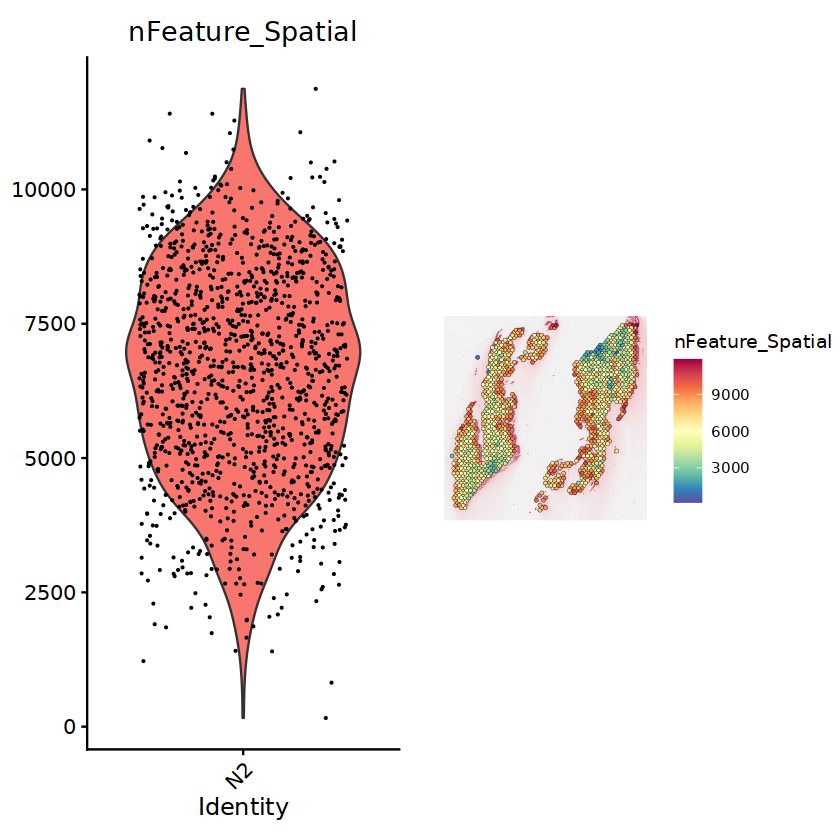

In [11]:
plot1 <- VlnPlot(mydata, features = "nFeature_Spatial", pt.size = 0.1) + NoLegend()
plot2 <- SpatialFeaturePlot(mydata, features = "nFeature_Spatial") + theme(legend.position = "right")
plot_grid(plot1, plot2)

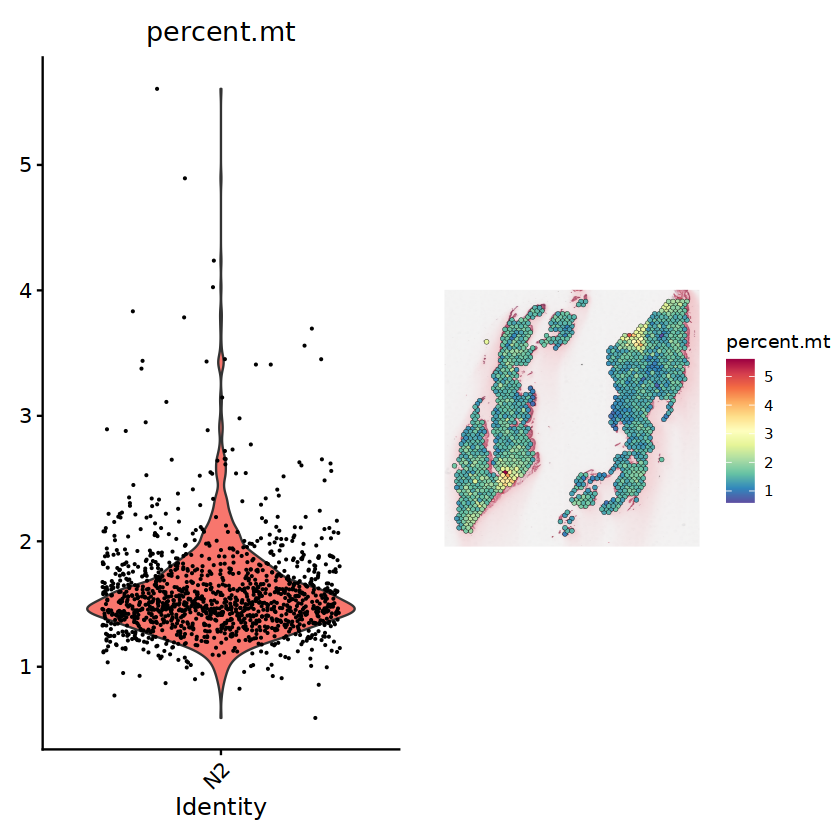

In [12]:
mydata[["percent.mt"]] <- PercentageFeatureSet(mydata, pattern = "^MT[-]")
plot1 <- VlnPlot(mydata, features = "percent.mt", pt.size = 0.1) + NoLegend()
plot2 <- SpatialFeaturePlot(mydata, features = "percent.mt") + theme(legend.position = "right")
plot_grid(plot1, plot2)

In [13]:
mydata2 <- subset(mydata, subset = nFeature_Spatial > 200 & nFeature_Spatial <7500 & nCount_Spatial > 1000 & nCount_Spatial < 60000 & percent.mt < 25)
mydata2

An object of class Seurat 
18085 features across 857 samples within 1 assay 
Active assay: Spatial (18085 features, 0 variable features)
 1 image present: image

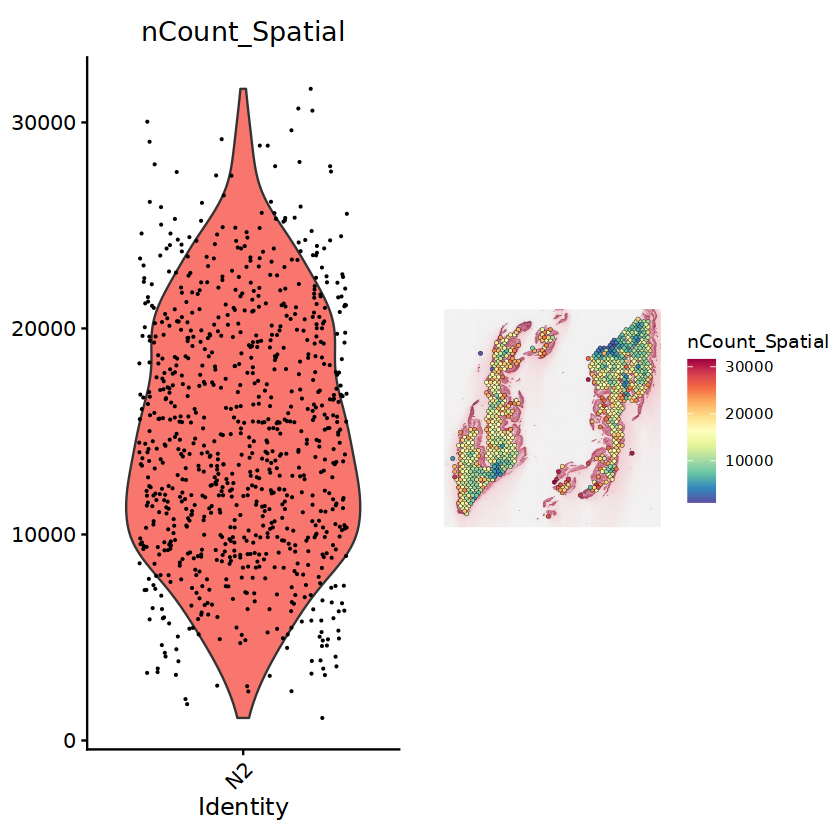

In [14]:
plot1 <- VlnPlot(mydata2, features = "nCount_Spatial", pt.size = 0.1) + NoLegend()
plot2 <- SpatialFeaturePlot(mydata2, features = "nCount_Spatial") + theme(legend.position = "right")
plot_grid(plot1, plot2)

In [15]:
mydata <- SCTransform(mydata, assay = "Spatial", verbose = FALSE)

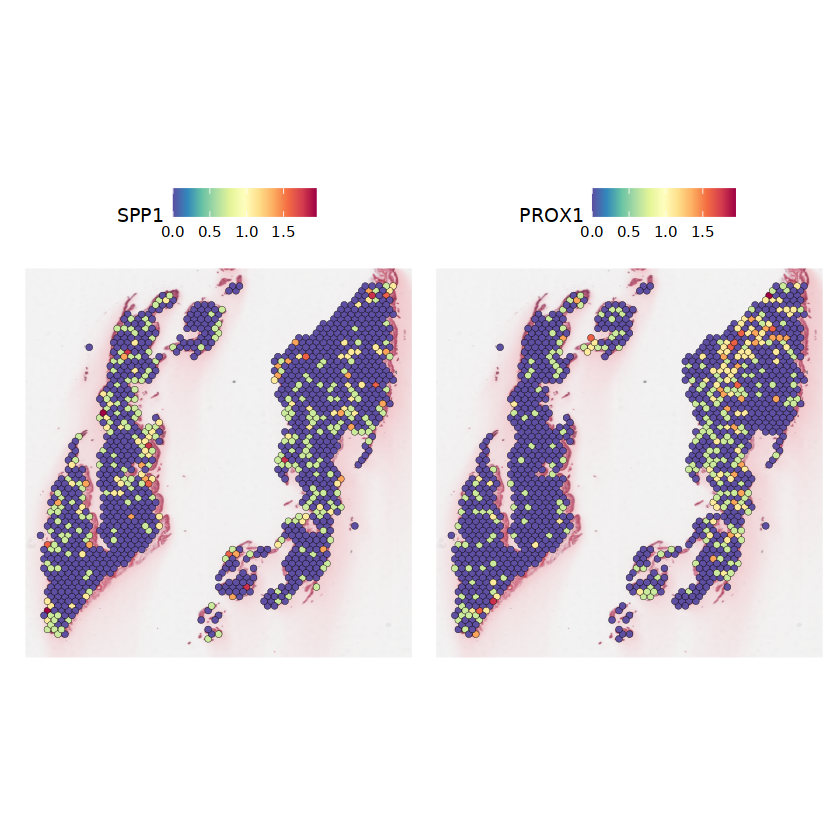

In [18]:
SpatialFeaturePlot(mydata, features = c("SPP1",'PROX1'))

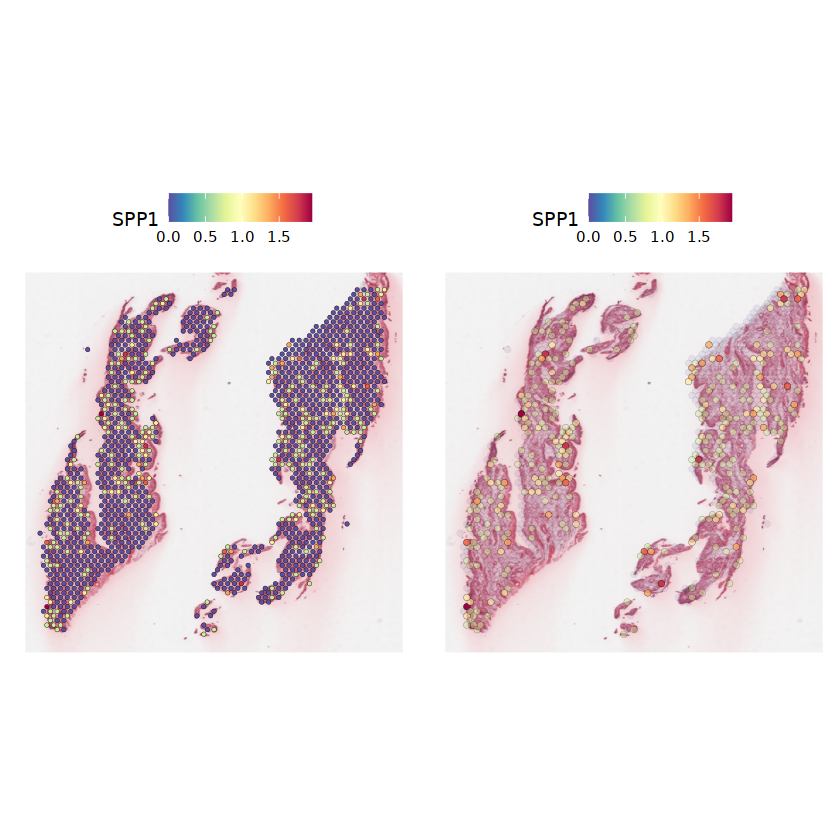

In [19]:
p1 <- SpatialFeaturePlot(mydata, features = "SPP1", pt.size.factor = 1)
p2 <- SpatialFeaturePlot(mydata, features = "SPP1", alpha = c(0.1, 1))
plot_grid(p1, p2)

In [20]:
mydata <- RunPCA(mydata, assay = "SCT", verbose = FALSE)
mydata <- FindNeighbors(mydata, reduction = "pca", dims = 1:30)
mydata <- FindClusters(mydata, verbose = FALSE,resolution = 0.8)
mydata <- RunUMAP(mydata, reduction = "pca", dims = 1:30,resolution = 0.8)

Computing nearest neighbor graph

Computing SNN

Warning message:
"The following arguments are not used: resolution"
Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
05:10:30 UMAP embedding parameters a = 0.9922 b = 1.112

05:10:30 Read 1308 rows and found 30 numeric columns

05:10:30 Using Annoy for neighbor search, n_neighbors = 30

05:10:30 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

05:10:30 Writing NN index file to temp file /tmp/Rtmp4AhNzz/file256984bb94d7b

05:10:30 Searching Annoy index using 1 thread, search_k = 3000

05:10

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


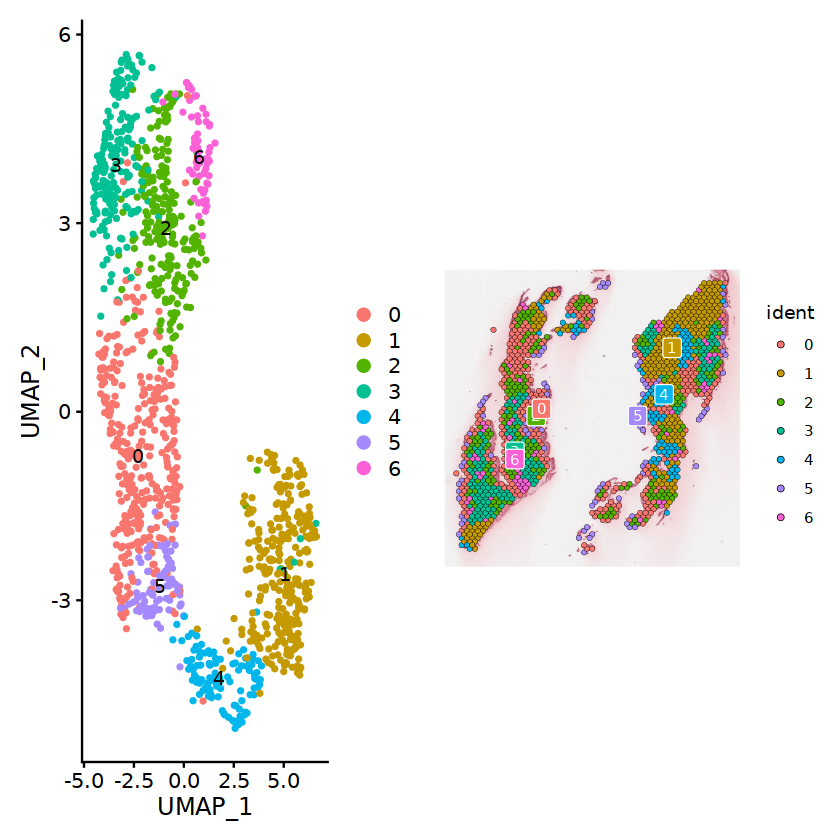

In [21]:
p1 <- DimPlot(mydata, reduction = "umap", label = TRUE)
p2 <- SpatialDimPlot(mydata, label = TRUE, label.size = 3)
plot_grid(p1, p2)

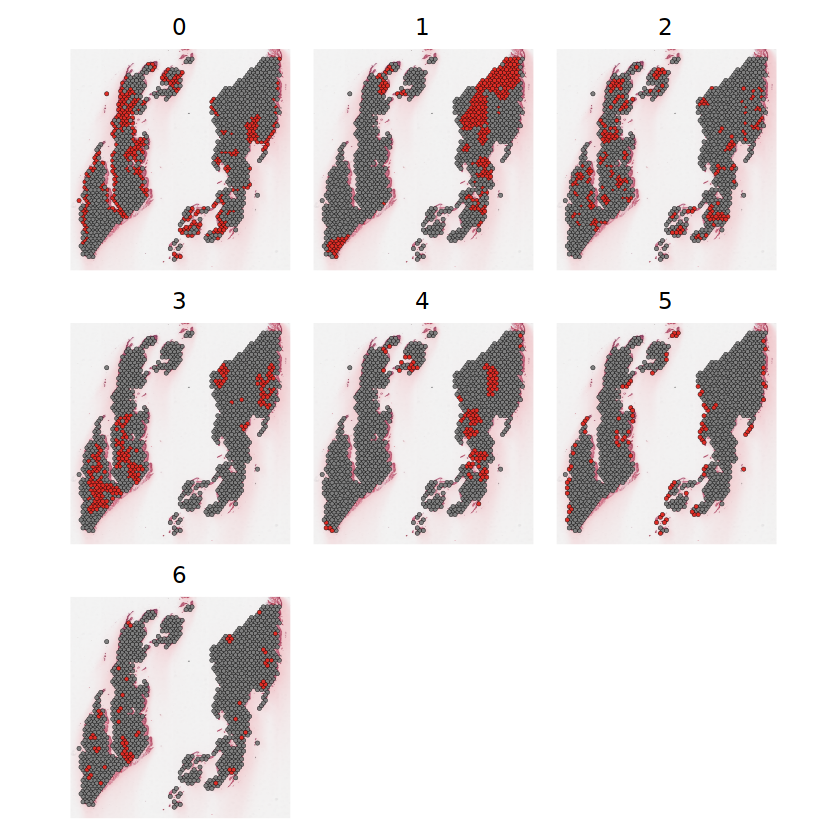

In [23]:
SpatialDimPlot(mydata, cells.highlight = CellsByIdentities(object = mydata, idents = c(0,1, 2, 3, 4, 
   5, 6)), facet.highlight = TRUE, ncol = 3)

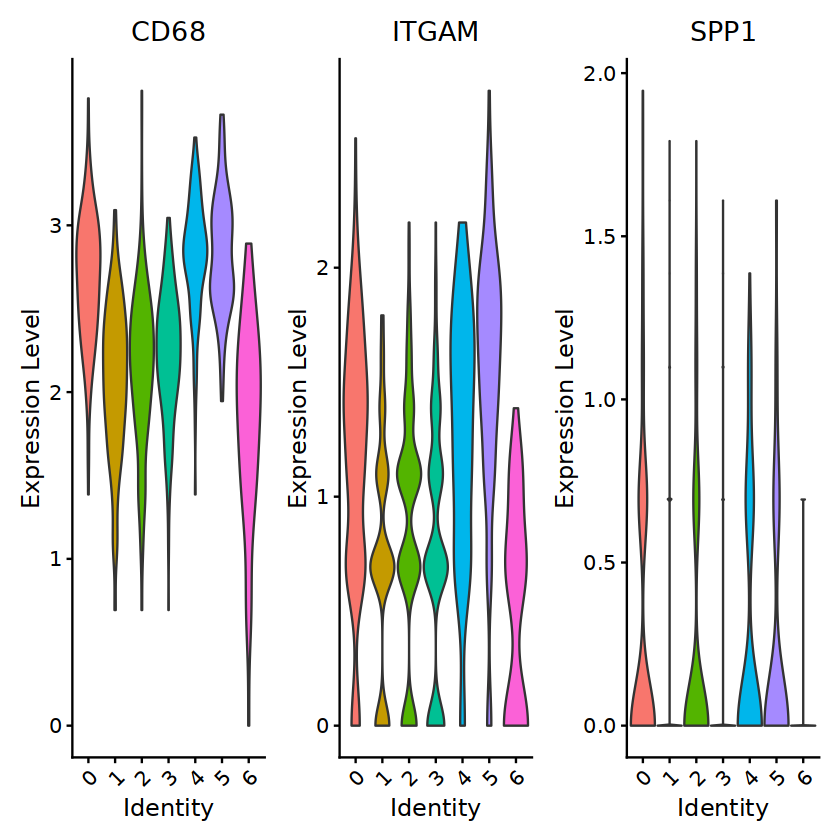

In [24]:
VlnPlot(mydata,features = c('CD68','ITGAM','SPP1'), group.by = "seurat_clusters",pt.size = 0)


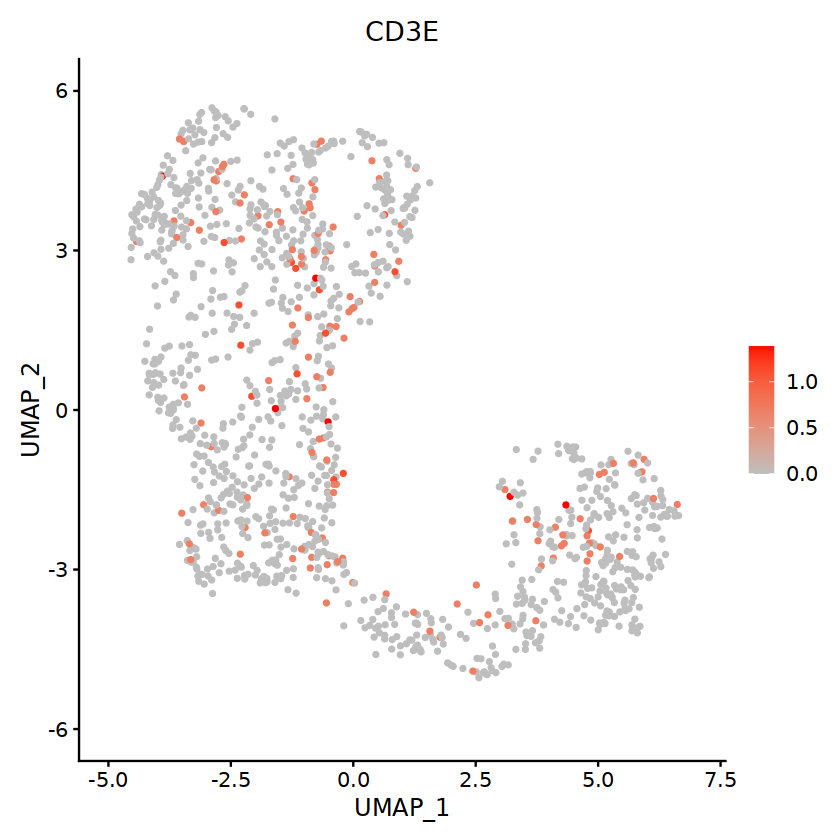

In [25]:
FeaturePlot(mydata, features = c('CD3E'), cols = c("grey", "red"),reduction = "umap")

In [26]:
saveRDS(mydata,file = 'N2.rds')